# Notebook Structure

1. Import necessary dependencies
2. Create the dataset
3. Create bubble chart


# 1. Import necessary dependencies

In [66]:
# libraries & dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

# 2. Create the dataset

In [65]:
# Generate Sample Data for 20 Companies
np.random.seed(42)
num_companies = 20
data = {
    'Company': [f'Company {i+1}' for i in range(num_companies)],
    'Revenue (Millions)': np.random.uniform(20, 500, num_companies),
    'Growth (%)': np.random.uniform(-15, 35, num_companies),  # Wider growth range
    'Market Cap (Billions)': np.random.uniform(1, 50, num_companies)
}

In [67]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data)
df

,Company,Revenue (Millions),Growth (%),Market Cap (Billions)
0,Company 1,199.779257,15.592645,6.979874
1,Company 2,476.342867,-8.025307,25.263669
2,Company 3,371.357092,-0.392768,2.685038
3,Company 4,307.356072,3.318092,45.556700
4,Company 5,94.888947,7.803499,13.680219
5,Company 6,94.877370,24.258798,33.463592
6,Company 7,47.880134,-5.016311,16.273843
7,Company 8,435.764550,10.711722,26.483333
8,Company 9,308.535206,14.620728,27.788804
9,Company 10,359.874837,-12.677479,10.057868


# 3. Create the bubble chart

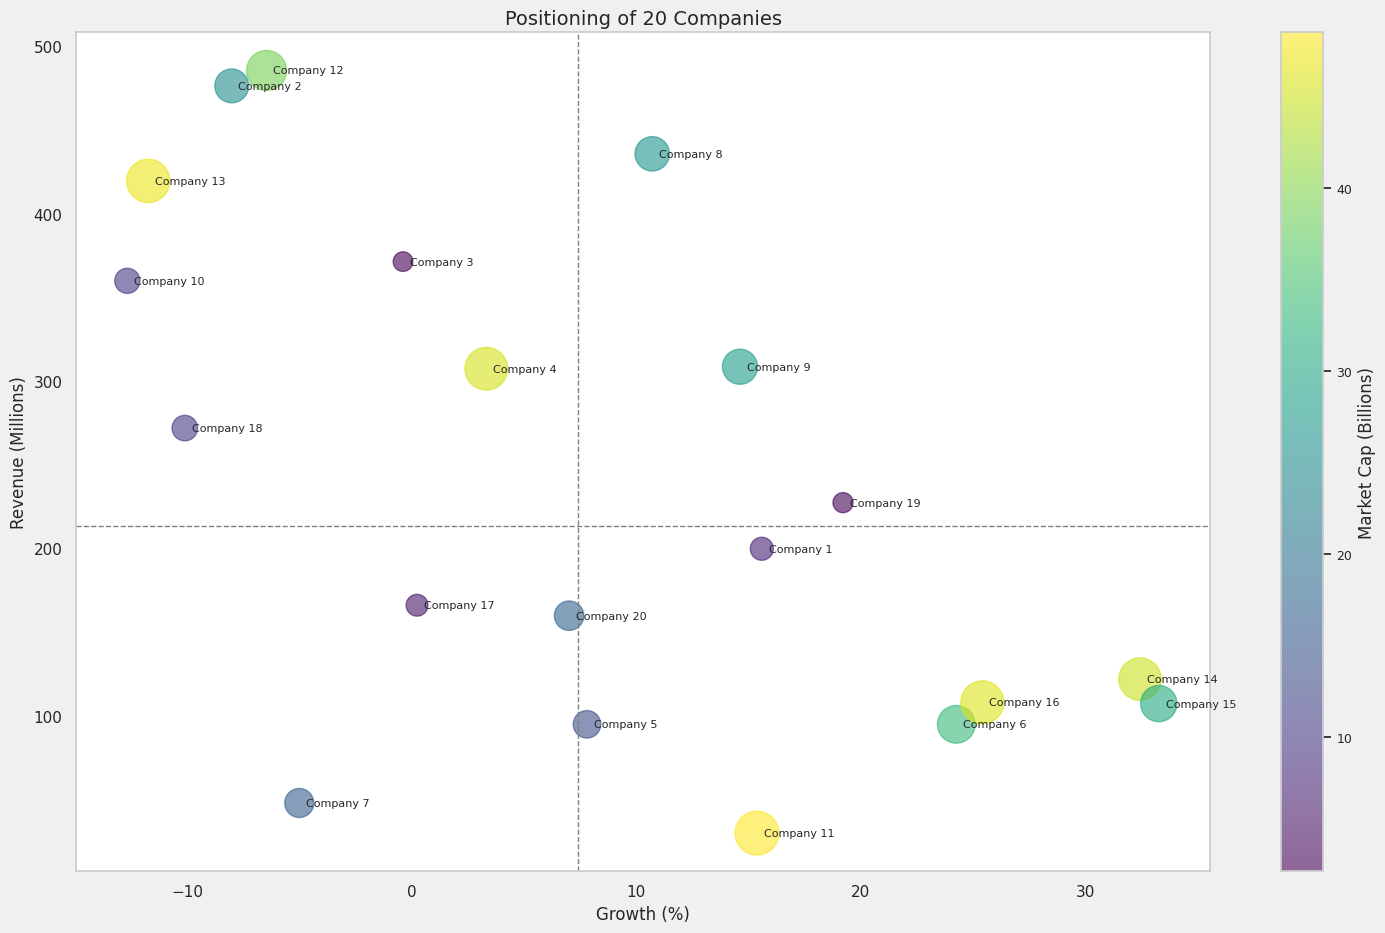

In [73]:
# --- Matplotlib Code ---

fig, ax = plt.subplots(figsize=(16, 10))  # Make the figure wider
fig.patch.set_facecolor('#f0f0f0')

# Normalize market cap for bubble size
min_cap = df['Market Cap (Billions)'].min()
max_cap = df['Market Cap (Billions)'].max()
size = (df['Market Cap (Billions)'] - min_cap) / (max_cap - min_cap) * 800 + 200  # Larger scaling for better visibility

# Create the bubble chart
scatter = ax.scatter(df['Growth (%)'], df['Revenue (Millions)'], s=size, alpha=0.6, c=df['Market Cap (Billions)'], cmap='viridis')

# Annotate all bubbles with the company name
for i, row in df.iterrows():
    ax.annotate(row['Company'], (row['Growth (%)'] + 0.3, row['Revenue (Millions)']), fontsize=8, ha='left', va='center')

# Add vertical and horizontal lines for quadrants
median_growth = df['Growth (%)'].median()
median_revenue = df['Revenue (Millions)'].median()

ax.axvline(median_growth, color='gray', linestyle='--', linewidth=1)
ax.axhline(median_revenue, color='gray', linestyle='--', linewidth=1)

# Set labels and title
ax.set_xlabel('Growth (%)', fontsize=12)
ax.set_ylabel('Revenue (Millions)', fontsize=12)
ax.set_title('Positioning of 20 Companies', fontsize=14)

# Add a colorbar for market cap
cbar = fig.colorbar(scatter, ax=ax, label='Market Cap (Billions)')
cbar.ax.tick_params(labelsize=9)



ax.grid(visible=None)

# Improve layout
plt.tight_layout(rect=[0, 0, 0.95, 0.95]) # Adjust layout to make space for legend
plt.show()